In [27]:
!pip install spacepy
!pip install cdflib
!pip install matplotlib
import numpy as np
import math

In [28]:
from spacepy import pycdf
import cdflib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
#dmsp-f16_ssm_magnetometer_20130601_v1.0.4.cdf
![Binder](https://mybinder.org/badge_logo.svg)(https://mybinder.org/v2/gh/lkilcommons/OvationPyme/HEAD?labpath=notebooks%2FInteractiveWithHemisphericPower.ipynb)


/bin/bash: -c: line 1: syntax error near unexpected token `https://mybinder.org/badge_logo.svg'
/bin/bash: -c: line 1: `[Binder](https://mybinder.org/badge_logo.svg)(https://mybinder.org/v2/gh/lkilcommons/OvationPyme/HEAD?labpath=notebooks%2FInteractiveWithHemisphericPower.ipynb)'


CDFInfo(CDF=PosixPath('/content/dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf'), Version='2.7.2', Encoding=1, Majority='Column_major', rVariables=[], zVariables=['Epoch', 'ELE_COUNTS_OBS', 'ELE_COUNTS_BKG', 'ELE_DIFF_ENERGY_FLUX', 'ELE_DIFF_ENERGY_FLUX_STD', 'ELE_TOTAL_ENERGY_FLUX', 'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD', 'ION_COUNTS_OBS', 'ION_COUNTS_BKG', 'ION_DIFF_ENERGY_FLUX', 'ION_DIFF_ENERGY_FLUX_STD', 'ION_TOTAL_ENERGY_FLUX', 'ION_TOTAL_ENERGY_FLUX_STD', 'ION_AVG_ENERGY', 'ION_AVG_ENERGY_STD', 'SC_ECI', 'SC_GEOCENTRIC_LAT', 'SC_GEOCENTRIC_LON', 'SC_GEOCENTRIC_R', 'SC_AACGM_LAT', 'SC_AACGM_LON', 'SC_AACGM_LTIME', 'CHANNEL_ENERGIES', 'metavar0'], Attributes=[{'Project': 'Global'}, {'Source_name': 'Global'}, {'Discipline': 'Global'}, {'Data_type': 'Global'}, {'Descriptor': 'Global'}, {'File_naming_convention': 'Global'}, {'Data_version': 'Global'}, {'PI_name': 'Global'}, {'PI_affiliation': 'Global'}, {'TEXT': 'Globa

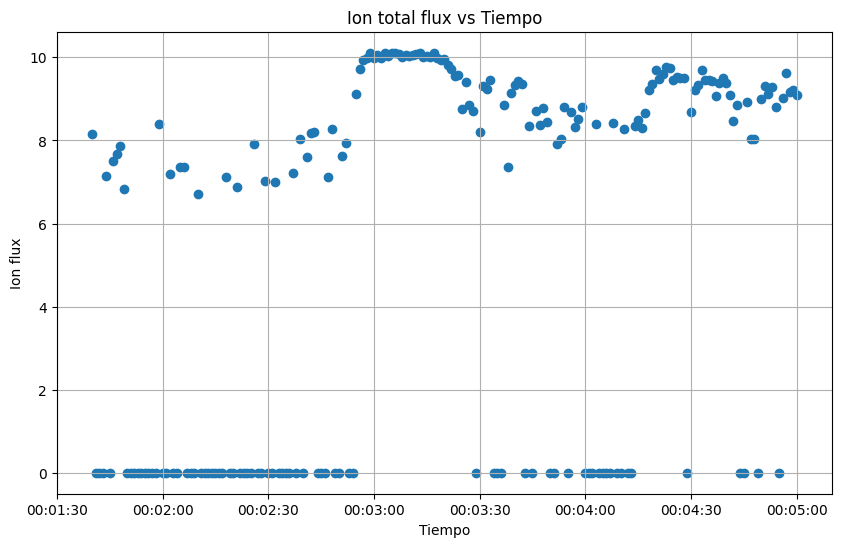

'\n# Obtener la información del archivo\ninfo = archivo_cdf()\n\n# Acceder directamente a las propiedades del objeto CDFInfo\nr_variables = info.rVariables  # Variables de registro\nz_variables = info.zVariables  # Variables no de registro\n\n# Listar todas las variables\nprint("Etiquetas (Labels) del archivo CDF:")\nfor var in r_variables + z_variables:\n    print(var)\nfor var in z_variables:\n    # Obtener los atributos de la variable\n    atributos = cdf.varattsget(var)\n    \n    # Verificar si existe el atributo de unidades\n    unidades = atributos.get(\'UNITS\', \'Sin unidades definidas\')\n    \n    print(f"Variable: {var}, Unidades: {unidades}")\n'

In [24]:
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')
info = archivo.cdf_info()

print(info)
tiempo = archivo.varget('Epoch')
total_i_flux = archivo.varget('ION_TOTAL_ENERGY_FLUX')
N1=100
N2=300
log_i_flux=[]
I=N1
for elem in total_i_flux:
    if I <= N2:
        if elem > 0:
            log_i_flux.append(math.log10(elem))
            I+=1

        else:
            log_i_flux.append(elem)
            I+=1
#necesario para que sea legible
tiempo_final = cdflib.cdfepoch.to_datetime(tiempo)

plt.figure(figsize=(10, 6))
plt.scatter(tiempo_final[N1:N2+1],log_i_flux)
plt.xlabel('Tiempo')
plt.ylabel('Ion flux')
plt.title('Ion total flux vs Tiempo')
plt.grid(True)
plt.show()
# Carga el archivo CDF
archivo_cdf = "ruta/del/archivo.cdf"

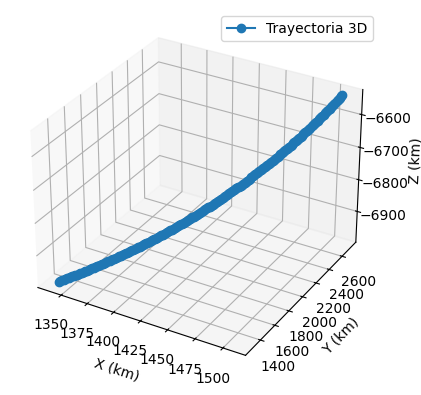

In [26]:
# Carga del archivo CDF
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')

# Obtener las variables
latitud = archivo.varget('SC_GEOCENTRIC_LAT')  # Latitud en grados
longitud = archivo.varget('SC_GEOCENTRIC_LON')  # Longitud en grados
altitud = archivo.varget("SC_GEOCENTRIC_R")  # Radio geocéntrico en km

# Selección de rango de datos
N1, N2 = 100, 300

# Convertir latitud y longitud de grados a radianes
lat_rad = np.radians(latitud[N1:N2+1])
lon_rad = np.radians(longitud[N1:N2+1])
r = altitud[N1:N2+1]

# Conversión a coordenadas cartesianas
x = r * np.cos(lat_rad) * np.cos(lon_rad)
y = r * np.cos(lat_rad) * np.sin(lon_rad)
z = r * np.sin(lat_rad)

# Graficar la trayectoria en 3D
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z, label="Trayectoria 3D", marker="o")

# Etiquetas y leyenda
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")
plt.legend()
plt.show()